# **Notas**
## **Alunos:**
    **Leydson Barros**    
    **Leandro Damaceno**


---



> https://medium.com/data-hackers/uma-introdu%C3%A7%C3%A3o-simples-ao-pandas-1e15eea37fa1



# --**Brazilian Cities**--


1.   Classificação: Ouro
2.   Usabilidade: 10





> https://www.kaggle.com/datasets/crisparada/brazilian-cities


# --**Importações bibliotecas**-- 

In [ ]:
import numpy as np
import pandas as pd
from numpy import log10
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline


# **Base de dados** 

In [ ]:

df_brazil=pd.read_csv("datas\BRAZIL_CITIES_REV2022.CSV",sep=",")
df_dictionary=pd.read_csv("datas\Data_Dictionary.csv",sep=";")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


# ***Especificação***
#### 1. **Coletar	dados ok**
#### 2.	**Realizar pré-processamento	dos	dados - **	


*   Definição	de	tipos - ok
*   Tratamento	de	dados	ausentes - ok
*   Normalização	e	discretização 
*   Limpeza	de	dados	(univariado,	bivariado	e	
multivariado)
#### 3.	**Apresentar estatísticas descritivas	dos	dados com	visualizações - ok** 
#### 4.	**Realizar teste	de	hipóteses para comparação de	valores	de	categorias	(ex.	preço	m2 em diferentes bairros)	e	visualizar diferenças - **


# **Bônus:**


*   Integrar	dados	ou extrair	dados	da	Web
*   Utilizar técnicas não cobertas nas aula


# **Pré-processamento** 

### Visualização dos dados

In [ ]:
# Dicionário do dataframe
#df_dictionary

In [ ]:
df_brazil.head()

In [ ]:
 #Verificando se existe dados nulos
print(df_brazil.isnull().sum())

In [ ]:
df_brazil.info()

<h1>Limpeza dos dados (Leandro)<h1> 

<h2>Verificando se existe dados duplicados<h2>

In [ ]:
len(df_brazil)


In [4]:
#  Eliminando linhas duplicadas, Cidades: Assis, Paraty e Nova Fátima
df_brazil = df_brazil.drop_duplicates()

In [ ]:
len(df_brazil)

In [ ]:
df_brazil[df_brazil['CITY'] == 'Paraty'][['CITY','STATE','LAT','LONG']]

In [5]:
# Cidade de Paraty possui dois dados sobre a agência de correios, eliminei o diferente de 1 (pesquisado no google que só existe uma agência)
df_brazil.drop(df_brazil.loc[(df_brazil['CITY']=='Paraty') & (df_brazil['POST_OFFICES'] != 1)].index, inplace=True)

In [ ]:
len(df_brazil)

<h2>Limpeza dos dados discrepantes<h2>

In [ ]:
# De acordo com o IBGE a menor cidade do Brasil tem 3565 km², dando o código abaixo , retona 3 cidades com área 0
df_brazil[(df_brazil['AREA'] < 3.565)][['CITY', 'STATE', 'AREA', 'IDHM']]


In [6]:
#Limpando as cidades que tem área menor que 3.565 km², pois foipesquisado que nao existe cidade menor que essetamanho de área
df_brazil.drop(df_brazil.loc[(df_brazil['AREA'] < 3.565)].index, inplace=True)

In [ ]:
len(df_brazil)

In [7]:
# De acordo com o IBGE a  cidade do Brasil menos povoada tem 776 pessoas
df_brazil[(df_brazil['IBGE_RES_POP'] < 776)][['CITY', 'STATE', 'AREA', 'IBGE_RES_POP']]

,CITY,STATE,AREA,IBGE_RES_POP
436,Balneário Rincão,SC,63.431,0
2666,Lagoa Dos Patos,RS,10158.754,0
2673,Lagoa Mirim,RS,2859.139,0
3079,Mojuí Dos Campos,PA,4988.236,0
3569,Paraíso Das Águas,MS,5061.433,0
3722,Pescaria Brava,SC,106.853,0
3781,Pinto Bandeira,RS,104.856,0


In [8]:
#Eliminando as cidades que tem menos de 776 habitantes
df_brazil.drop(df_brazil.loc[(df_brazil['IBGE_RES_POP'] < 776)].index, inplace=True)

In [ ]:
len(df_brazil)

In [ ]:
#Verificando as cidades que tem IDHM menor que 0.0
df_brazil.loc[(df_brazil['IDHM'] == 0.0)][['CITY','STATE','IDHM','IDHM_Renda','IDHM_Longevidade','IDHM_Educacao']]

In [9]:
#Eliminando as cidades que tem IDHM menor que 0.0
df_brazil.drop(df_brazil.loc[(df_brazil['IDHM'] == 0.0)].index, inplace=True)

<h2>Limpeza dos outliers usando z-score robusto (univariado)<h2>

In [ ]:
# decidi pegar a coluna GDP, o produto interno bruto de cada cidade brasileira
df_brazil['GDP'].value_counts()

In [ ]:
df_brazil['GDP'].describe()

<AxesSubplot:>

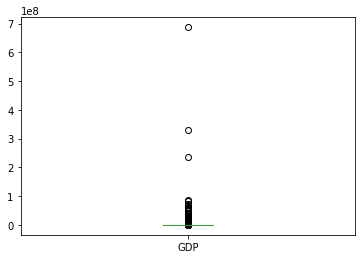

In [11]:
# Usando plotbox para achar os outliers
df_brazil['GDP'].plot.box()

<AxesSubplot:>

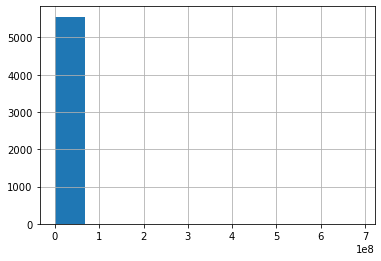

In [12]:
df_brazil['GDP'].hist()

<AxesSubplot:>

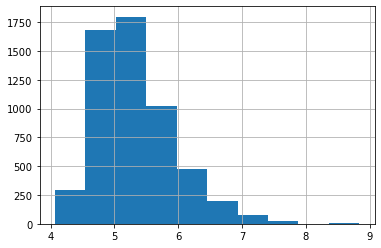

In [10]:
# Como visto em cima , os dados não estão simétricos , então aplicamos log10 e criamos uma coluna que é justamente a coluna GDP na base 10
df_brazil['GDP_Log'] = log10(df_brazil['GDP'])
df_brazil['GDP_Log'].hist()

In [13]:
# agora podemos usar o  z-core robusto
from numpy import abs
mad = abs(df_brazil['GDP_Log'] - df_brazil['GDP_Log'].median()).median()*(1/0.6745)
print(mad)

0.5557684414533213


<AxesSubplot:>

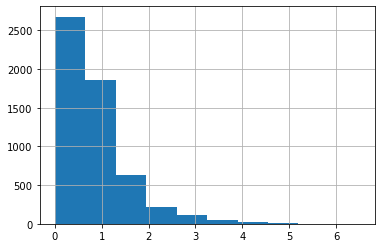

In [14]:
# Agora vamos plotar o z-score robusto
(abs(df_brazil['GDP_Log']-df_brazil['GDP_Log'].median())/mad).hist()

In [15]:
# Usando a limiar > 3.25, encontro os outliers
df_brazil[abs(df_brazil['GDP_Log']-df_brazil['GDP_Log'].median())/mad > 3.25]

,CITY,STATE,CAPITAL,IBGE_RES_POP,IBGE_RES_POP_BRAS,IBGE_RES_POP_ESTR,IBGE_DU,IBGE_DU_URBAN,IBGE_DU_RURAL,IBGE_POP,IBGE_1,IBGE_1-4,IBGE_5-9,IBGE_10-14,IBGE_15-59,IBGE_60+,IBGE_PLANTED_AREA,IBGE_CROP_PRODUCTION_$,IDHM Ranking 2010,IDHM,IDHM_Renda,IDHM_Longevidade,IDHM_Educacao,LONG,LAT,ALT,PAY_TV,FIXED_PHONES,AREA,REGIAO_TUR,CATEGORIA_TUR,ESTIMATED_POP,RURAL_URBAN,GVA_AGROPEC,GVA_INDUSTRY,GVA_SERVICES,GVA_PUBLIC,GVA_TOTAL,TAXES,GDP,POP_GDP,GDP_CAPITA,GVA_MAIN,MUN_EXPENDIT,COMP_TOT,COMP_A,COMP_B,COMP_C,COMP_D,COMP_E,COMP_F,COMP_G,COMP_H,COMP_I,COMP_J,COMP_K,COMP_L,COMP_M,COMP_N,COMP_O,COMP_P,COMP_Q,COMP_R,COMP_S,COMP_T,COMP_U,HOTELS,BEDS,Pr_Agencies,Pu_Agencies,Pr_Bank,Pu_Bank,Pr_Assets,Pu_Assets,Cars,Motorcycles,Wheeled_tractor,UBER,MAC,WAL-MART,POST_OFFICES,GDP_Log
230,Anápolis,GO,0,334613,333947,666,104418,102621,1797,301151,4261,16632,22387,26102,201477,30292,11805,63815,869,0.737,0.737,0.822,0.660,-48.9572,-16.3288,1023.4352,22148,66643,933.156,Região Turística Dos Negócios E Tradições,B,381970,Urbano,54165,3712361,5874020,1426500,11067047,2051712,13118759,370875,35372.0,Demais serviços,990890692,9170,41,5,963,3,28,501,4047,407,448,121,175,205,407,613,6,377,308,113,402,0,0,7,627,22,15,4,3,2325572354,28144438043,134923,73452,12,1,1,0,10,7.117893
235,Aparecida De Goiânia,GO,0,455657,455315,342,136583,136408,176,452266,7452,29804,38420,42004,307200,27386,113,576,1367,0.718,0.716,0.834,0.620,-49.2433,-16.8221,827.0000,25295,114202,278.539,Região Turística Dos Negócios E Tradições,C,565957,Urbano,10267,2468260,6057955,1783782,10320265,1660720,11980985,532135,22515.0,Demais serviços,0,8947,19,12,1355,2,45,744,3803,318,414,158,115,100,334,645,5,323,184,87,284,0,0,2,43,13,12,3,2,769152705,3205937623,138951,102673,25,0,1,0,6,7.078493
256,Aracaju,SE,1,571149,570674,475,169830,169830,0,566369,7978,32261,39994,46322,388256,51558,38,132,230,0.770,0.784,0.823,0.708,-37.0482,-10.9072,4.2883,50717,126511,182.163,Polo Costa Dos Coqueirais,A,648939,Urbano,2679,2624804,9244912,2652552,14524947,1973535,16498482,641523,25718.0,Demais serviços,1300130786,14534,23,14,721,5,21,717,5262,358,1078,349,182,287,1081,1634,38,565,971,265,963,0,0,0,0,20,51,5,4,2731893609,52322358115,173933,78612,96,1,4,5,14,7.217444
311,Araucária,PR,0,119123,119036,87,35508,32832,2676,107927,1690,6568,8805,10320,73194,7350,29566,168602,781,0.740,0.743,0.852,0.639,-49.4019,-25.5916,903.2763,10693,32322,469.240,Rotas Do Pinhão,B,141410,Urbano,142543,8948487,4827455,800602,14719087,2259713,16978801,135459,125343.0,Indústrias de transformação,581165348,3405,21,14,465,0,27,225,1311,244,227,48,41,38,129,221,8,143,63,35,145,0,0,1,62,8,5,3,2,772957921,4117520258,54618,12514,40,0,0,0,4,7.229907
514,Barueri,SP,0,240749,239837,912,71821,71821,0,235508,3621,13818,18217,21665,161351,16836,0,0,91,0.786,0.791,0.866,0.708,-46.8747,-23.5089,741.5651,57271,191288,65.701,Negócios E Cultura,C,271306,Urbano,316,4212889,28113201,1747222,34073627,13014675,47088302,264935,177735.0,Demais serviços,2005218096,12513,14,7,711,9,34,713,3432,661,816,859,820,516,1222,1469,4,322,303,129,472,0,0,0,0,49,14,11,2,84219450730,6677655640,110360,27564,99,0,7,1,7,7.672913
530,Bauru,SP,0,343937,343437,500,109918,109134,785,336374,4095,16362,22170,25539,224032,44176,4425,60396,37,0.801,0.800,0.854,0.752,-49.0830,-22.3251,510.0885,62637,137033,667.684,Coração Paulista,B,374272,Urbano,35379,2407619,8212768,1324388,11980154,1160932,13141086,369368,35577.0,Demais serviços,884996534,12452,81,4,661,1,24,530,5504,453,939,279,232,263,672,1144,8,406,515,147,589,0,0,0,0,35,21,6,2,5675309236,9228598568,175000,57136,36,1,4,1,10,7.118631
550,Belo Horizonte,MG,1,2375151,2369063,6088,762924,762924,0,2263631,25105,99493,135491,160227,1553724,289591,0,0,20,0.810,0.841,0.856,0.737,-43.9265,-19.9375,937.5280,474416,1137695,331.401,Belo Horizonte,A,2501576,Urbano,2300,11901586,53213121,10664797,75781804,12495658,88277463,2513451,35122.0,Demais serviços,7899696615,103867,226,139,5221,96,156,6235,28240,2733,6514,3951,3501,2785,11925,17

In [ ]:
len(df_brazil)

In [16]:
# Gerando novo dataframe, eliminando os outros
df_brazil = df_brazil[abs(df_brazil['GDP_Log']-df_brazil['GDP_Log'].median())/mad < 3.25]

In [ ]:
len(df_brazil)

<h2>Bivariada<h2>

<AxesSubplot:xlabel='COMP_TOT', ylabel='AREA'>

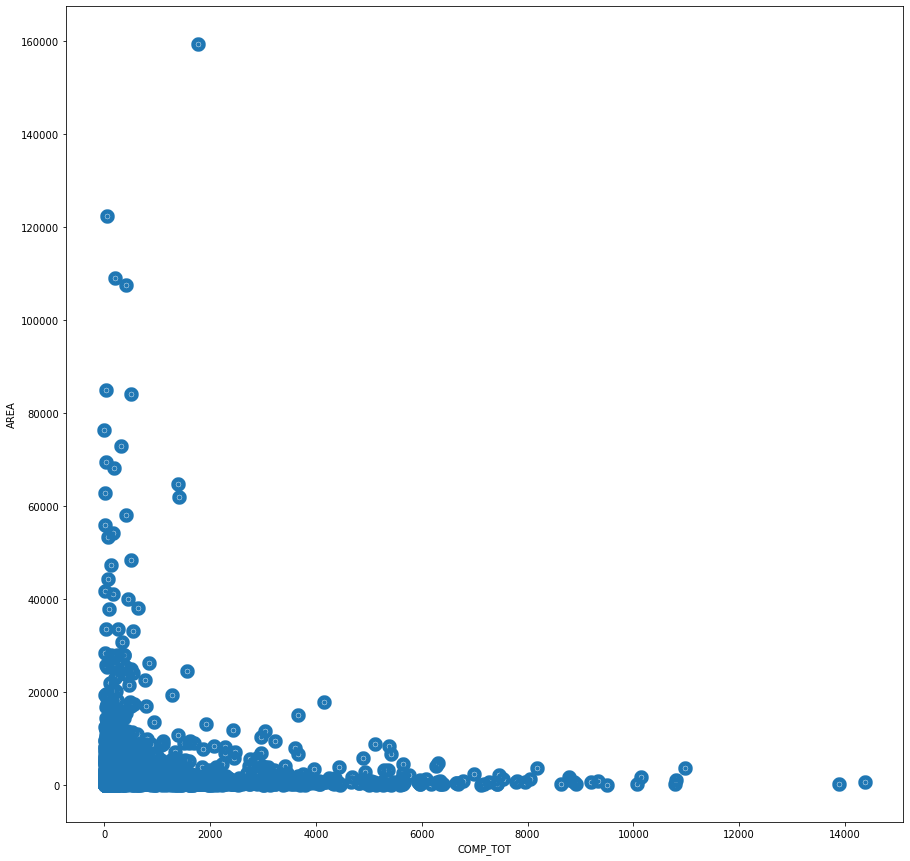

In [17]:
# usando duas colunas 'COMP_TOTAL' E 'AREA', que são o total de companias de cada estado e a área de em km²
#  respectivamente, percebesse alguns outliers
df_brazil.plot.scatter(x='COMP_TOT',y='AREA', figsize=(15,15), linewidths = 10)

In [19]:
df_brazil['COMP_AREA'] = df_brazil['COMP_TOT'] / df_brazil['AREA']

In [20]:
# Agora que fizemos a divisão, transfomando em uma univarada partir daqui repetimos na coluna comp_area o mesmo processo de z-score robusto
df_brazil['COMP_AREA'].describe()

count    5478.000000
mean        1.778645
std         8.422499
min         0.000078
25%         0.131097
50%         0.383722
75%         1.039050
max       251.863841
Name: COMP_AREA, dtype: float64

In [ ]:
df_brazil['COMP_AREA'].plot.box()

In [ ]:
df_brazil['COMP_AREA'].hist()

In [ ]:
df_brazil['COMP_AREA_L'] = log10(df_brazil['COMP_AREA'])
df_brazil['COMP_AREA_L'].hist()

In [ ]:
mad = abs(df_brazil['COMP_AREA_L'] - df_brazil['COMP_AREA_L'].median()).median()*(1/0.6745)

In [ ]:
(abs(df_brazil['COMP_AREA_L']-df_brazil['COMP_AREA_L'].median())/mad).hist()

In [ ]:
df_brazil[abs(df_brazil['COMP_AREA_L']-df_brazil['COMP_AREA_L'].median())/mad > 3.5]

In [ ]:
len(df_brazil)

In [ ]:
df_brazil = df_brazil[abs(df_brazil['COMP_AREA_L']-df_brazil['COMP_AREA_L'].median())/mad < 3.5]

In [ ]:
len(df_brazil)

<h2>Removendo outliers com Isolation Forests (multivariado)<h2>

In [ ]:
# Primeiro passo , categorizar
#df_brazil['CITY'] = df_brazil['CITY'].astype('category')
#df_brazil['STATE'] = df_brazil['STATE'].astype('category')
#df_brazil['REGIAO_TUR'] = df_brazil['REGIAO_TUR'].astype('category')
#df_brazil['CATEGORIA_TUR'] = df_brazil['CATEGORIA_TUR'].astype('category')
#df_brazil['RURAL_URBAN'] = df_brazil['RURAL_URBAN'].astype('category')
#df_brazil['GVA_MAIN'] = df_brazil['GVA_MAIN'].astype('category')

In [ ]:
#df_brazil['STATE'].cat.categories

In [ ]:
#df_brazil.head()

In [ ]:
#df_brazil['CITY'] = df_brazil['CITY'].cat.codes
#df_brazil['STATE'] = df_brazil['STATE'].cat.codes
#df_brazil['REGIAO_TUR'] = df_brazil['REGIAO_TUR'].cat.codes
#df_brazil['CATEGORIA_TUR'] = df_brazil['CATEGORIA_TUR'].cat.codes
#df_brazil['RURAL_URBAN'] = df_brazil['RURAL_URBAN'].cat.codes
#df_brazil['GVA_MAIN'] = df_brazil['GVA_MAIN'].cat.codes

In [ ]:
#from sklearn.ensemble import IsolationForest
#rng = np.random.RandomState(42)
#clf = IsolationForest(max_samples=100, random_state=rng)
#clf.fit(df_brazil)

In [ ]:
#scores = clf.predict(df_brazil)
#scores

In [ ]:
#df_brazil['outlier'] = scores
#print(df_brazil.head())

In [ ]:
#df_brazil[df_brazil['outlier'] == -1]


In [ ]:
#nova dataframe sem os campos com -1, ou seja sem os outliers
#df_brazil = df_brazil[df_brazil['outlier'] != -1]
#len(df_brazil)

### Discretização de dados 

In [ ]:
#Setando campos como categóricos
#ajustando tipos dos dados
df_brazil['CAPITAL'] = df_brazil['CAPITAL'].astype('category')
df_brazil['STATE'] = df_brazil['STATE'].astype('category')
df_brazil['CATEGORIA_TUR'] = df_brazil['CATEGORIA_TUR'].astype('category')
df_brazil['GVA_MAIN'] = df_brazil['GVA_MAIN'].astype('category')
df_brazil['RURAL_URBAN'] = df_brazil['RURAL_URBAN'].astype('category')



In [ ]:
df_brazil[['CAPITAL','STATE','CATEGORIA_TUR','GVA_MAIN','RURAL_URBAN']].dtypes

#### IDHM

#### **Discretizando o IDHM**

In [ ]:

df_brazil['IDHM_dist'] = 'Muito Baixo'

In [ ]:
df_brazil.loc[(df_brazil['IDHM'] <= 0.499),'IDHM_dist'] = 'Muito Baixo'
df_brazil.loc[(df_brazil['IDHM'] >= 0.5) & (df_brazil['IDHM'] <= 0.599),'IDHM_dist'] = 'Baixo'
df_brazil.loc[(df_brazil['IDHM'] >= 0.6) & (df_brazil['IDHM'] <= 0.699),'IDHM_dist'] = 'Médio'
df_brazil.loc[(df_brazil['IDHM'] >= 0.7) & (df_brazil['IDHM'] <= 0.799),'IDHM_dist'] = 'Alto'
df_brazil.loc[(df_brazil['IDHM'] >= 0.8) & (df_brazil['IDHM'] <= 1),'IDHM_dist'] = 'Muito Alto'
df_brazil['IDHM_dist'] = df_brazil['IDHM_dist'].astype('category')

In [ ]:
df_brazil['IDHM_dist'].cat.categories

#### IDHM_Renda

#### **Discretizando o IDHM Renda**

In [ ]:
df_brazil['IDHM_Renda_dist'] = 'Muito Baixo'

In [ ]:
df_brazil.loc[(df_brazil['IDHM_Renda'] <= 0.499),'IDHM_Renda_dist'] = 'Muito Baixo'
df_brazil.loc[(df_brazil['IDHM_Renda'] >= 0.5) & (df_brazil['IDHM_Renda'] <= 0.599),'IDHM_Renda_dist'] = 'Baixo'
df_brazil.loc[(df_brazil['IDHM_Renda'] >= 0.6) & (df_brazil['IDHM_Renda'] <= 0.699),'IDHM_Renda_dist'] = 'Médio'
df_brazil.loc[(df_brazil['IDHM_Renda'] >= 0.7) & (df_brazil['IDHM_Renda'] <= 0.799),'IDHM_Renda_dist'] = 'Alto'
df_brazil.loc[(df_brazil['IDHM_Renda'] >= 0.8) & (df_brazil['IDHM_Renda'] <= 1),'IDHM_Renda_dist'] = 'Muito Alto'
df_brazil['IDHM_Renda_dist'] = df_brazil['IDHM_Renda_dist'].astype('category')

#### IDHM_Longevidade

#### **Discretizando o IDHM Lonevidade**

In [ ]:
df_brazil['IDHM_Longevidade_dist'] = 'Muito Baixo'

In [ ]:
df_brazil.loc[(df_brazil['IDHM_Longevidade'] <= 0.499),'IDHM_Longevidade_dist'] = 'Muito Baixo'
df_brazil.loc[(df_brazil['IDHM_Longevidade'] >= 0.5) & (df_brazil['IDHM_Longevidade'] <= 0.599),'IDHM_Longevidade_dist'] = 'Baixo'
df_brazil.loc[(df_brazil['IDHM_Longevidade'] >= 0.6) & (df_brazil['IDHM_Longevidade'] <= 0.699),'IDHM_Longevidade_dist'] = 'Médio'
df_brazil.loc[(df_brazil['IDHM_Longevidade'] >= 0.7) & (df_brazil['IDHM_Longevidade'] <= 0.799),'IDHM_Longevidade_dist'] = 'Alto'
df_brazil.loc[(df_brazil['IDHM_Longevidade'] >= 0.8) & (df_brazil['IDHM_Longevidade'] <= 1),'IDHM_Longevidade_dist'] = 'Muito Alto'
df_brazil['IDHM_Longevidade_dist'] = df_brazil['IDHM_Longevidade_dist'].astype('category')

#### IDHM_Educacao

#### **Discretizando o IDHM Educação**

In [ ]:
df_brazil['IDHM_Educacao_dist'] = 'Muito Baixo'

In [ ]:
df_brazil.loc[(df_brazil['IDHM_Educacao'] <= 0.499),'IDHM_Educacao_dist'] = 'Muito Baixo'
df_brazil.loc[(df_brazil['IDHM_Educacao'] >= 0.5) & (df_brazil['IDHM_Educacao'] <= 0.599),'IDHM_Educacao_dist'] = 'Baixo'
df_brazil.loc[(df_brazil['IDHM_Educacao'] >= 0.6) & (df_brazil['IDHM_Educacao'] <= 0.699),'IDHM_Educacao_dist'] = 'Médio'
df_brazil.loc[(df_brazil['IDHM_Educacao'] >= 0.7) & (df_brazil['IDHM_Educacao'] <= 0.799),'IDHM_Educacao_dist'] = 'Alto'
df_brazil.loc[(df_brazil['IDHM_Educacao'] >= 0.8) & (df_brazil['IDHM_Educacao'] <= 1),'IDHM_Educacao_dist'] = 'Muito Alto'
df_brazil['IDHM_Educacao_dist'] = df_brazil['IDHM_Educacao_dist'].astype('category')

# **Análise do dataSet** 

In [ ]:
# Criando os dataframes por região

nordeste = df_brazil.loc[(df_brazil['STATE'] == 'PE') | (df_brazil['STATE'] == 'MA') | (df_brazil['STATE'] == 'RN') | (df_brazil['STATE'] == 'BA') | (df_brazil['STATE'] == 'CE') | (df_brazil['STATE'] == 'AL') | (df_brazil['STATE'] == 'PI') | (df_brazil['STATE'] == 'PB') | (df_brazil['STATE'] == 'SE')]
norte =  df_brazil.loc[(df_brazil['STATE'] == 'AC') | (df_brazil['STATE'] == 'AP') | (df_brazil['STATE'] == 'AM') | (df_brazil['STATE'] == 'PA') | (df_brazil['STATE'] == 'RO') | (df_brazil['STATE'] == 'RR') | (df_brazil['STATE'] == 'TO')]
sul = df_brazil.loc[(df_brazil['STATE'] == 'PR') | (df_brazil['STATE'] == 'RS') | (df_brazil['STATE'] == 'SC')]
centroOeste =  df_brazil.loc[(df_brazil['STATE'] == 'DF') | (df_brazil['STATE'] == 'GO') | (df_brazil['STATE'] == 'MT') | (df_brazil['STATE'] == 'MS')]
suldeste = df_brazil.loc[(df_brazil['STATE'] == 'ES') | (df_brazil['STATE'] == 'MG') | (df_brazil['STATE'] == 'SP') | (df_brazil['STATE'] == 'RJ')]
# Verificação dos estados 
checknordeste = ['PE','BA', 'MA','PI','CE','RN','PB','AL','SE']
checknorte = ['AC','AP', 'AM','PA','RO','RR','TO']
checksul = ['PR','RS', 'SC']
checkcentroOeste = ['DF','GO', 'MT','MS']
checksudeste = ['ES','MG', 'SP','RJ']
# Verificação das cidades por estado
cidadesNordeste = df_brazil["STATE"].isin(checknordeste)
cidadesNorte = df_brazil["STATE"].isin(checknorte)
cidadesSul = df_brazil["STATE"].isin(checksul)
cidadesCentroOeste = df_brazil["STATE"].isin(checkcentroOeste)
cidadesSudeste = df_brazil["STATE"].isin(checksudeste)

In [ ]:
# Mapa do Brasil 

long= df_brazil["LONG"] !=0
lat = df_brazil["LAT"] !=0 
## Montado o Mapa
plt.figure(figsize=(10,10))
plt.title(" Cidades (Latitude e Longitude)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.scatter(df_brazil[long&lat&cidadesNorte]["LONG"], df_brazil[long&lat&cidadesNorte]["LAT"], s=5, alpha=1, label='NORTE', c ='#006400')
plt.scatter(df_brazil[long&lat&cidadesNordeste]["LONG"], df_brazil[long&lat&cidadesNordeste]["LAT"], s=5, alpha=1, label='Nordeste', c ='#00BFFF')
plt.scatter(df_brazil[long&lat&cidadesCentroOeste]["LONG"], df_brazil[long&lat&cidadesCentroOeste]["LAT"], s=5, alpha=1, label='Centro Oeste', c ='#DB7093')
plt.scatter(df_brazil[long&lat&cidadesSul]["LONG"], df_brazil[long&lat&cidadesSul]["LAT"], s=5, alpha=1, label='SUL', c ='#9932CC')
plt.scatter(df_brazil[long&lat&cidadesSudeste]["LONG"], df_brazil[long&lat&cidadesSudeste]["LAT"], s=5, alpha=1, label='Sudeste', c ='#FF4500')

plt.legend()
plt.show()

In [ ]:
# Mapa do Brasil Capitais

long= df_brazil["LONG"] != 0
lat = df_brazil["LAT"] !=0 
cap = df_brazil['CAPITAL'] ==1
 
#Montando o Mapa
plt.figure(figsize=(10,10))
plt.title(" Cidades (Latitude e Longitude)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.scatter(df_brazil[long&lat&cap]["LONG"], df_brazil[long&lat&cap]["LAT"], s=50, alpha=1, label='Capital city', c ='#ff4500')
plt.scatter(df_brazil[long&lat&~cap]["LONG"], df_brazil[long&lat&~cap]["LAT"], s=1, alpha=1, label='cidades', c = '#32cd32')
plt.legend()
plt.show()

### **Índice de Desenvolvimento Humano** 

In [ ]:
df_brazil.boxplot(column=['IDHM'])

# **Analisando as Regiões** 

## **Norte**

In [ ]:
#Capitais
# Listando as capitais da região com seus Numero de população, IDHM, indicação de região turistica e sua categoria.
Capitais = norte.loc[norte['CAPITAL'] == 1][['CITY','IBGE_RES_POP','STATE','IDHM','IDHM_dist','REGIAO_TUR','CATEGORIA_TUR']].sort_values('IDHM', ascending=False).reset_index()
Capitais


In [ ]:
# Mapa do Norte

long= df_brazil["LONG"] !=0
lat = df_brazil["LAT"] !=0 
capNorte = norte['CAPITAL'] == 1

plt.figure(figsize=(10,10))
plt.title(" Cidades do Norte")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.scatter(df_brazil[long&lat&cidadesNorte]["LONG"], df_brazil[long&lat&cidadesNorte]["LAT"], s=5, alpha=1, label='Cidades', c ='#00BFFF')
plt.scatter(df_brazil[long&lat&capNorte]["LONG"], df_brazil[long&lat&capNorte]["LAT"], s=50, alpha=1, label='Capital city', c ='#ff4500')
plt.legend()
plt.show()

#### Analisando o IDHM da região norte:

In [ ]:
norte['IDHM'].var()

In [ ]:
norte['IDHM'].mean()

In [ ]:
norte.boxplot(column=['IDHM'])

In [ ]:
hist=sns.distplot(norte['IDHM'])

In [ ]:
#Histograma do IDHM
hist=norte['IDHM'].hist()

In [ ]:
norte['IDHM_dist'].value_counts().plot(kind='barh') 
plt.show()

In [ ]:
norte['IDHM_Renda_dist'].value_counts().plot(kind='barh') 
plt.show()

In [ ]:
norte['IDHM_Longevidade_dist'].value_counts().plot(kind='barh') 
plt.show()

In [ ]:
norte['IDHM_Educacao_dist'].value_counts().plot(kind='barh') 
plt.show()

In [ ]:
norte.cov()

In [ ]:
norte.plot.scatter(x='IDHM',y='COMP_TOT')

In [ ]:
#Comparando os IDHM dos estados do norte
# Criando lista
dados1 =  {'AC':norte[norte['STATE'] == 'AC'].IDHM_Educacao.mean() ,'AP':norte[norte['STATE'] == 'AP'].IDHM_Educacao.mean(), 'AM':norte[norte['STATE'] == 'AM'].IDHM_Educacao.mean(),'PA':norte[norte['STATE'] == 'PA'].IDHM_Educacao.mean(),'RO':norte[norte['STATE'] == 'RO'].IDHM_Educacao.mean(),'RR':norte[norte['STATE'] == 'RR'].IDHM_Educacao.mean(),'TO':norte[norte['STATE'] == 'TO'].IDHM_Educacao.mean()}
dados2 =  {'AC':norte[norte['STATE'] == 'AC'].IDHM.mean() ,'AP':norte[norte['STATE'] == 'AP'].IDHM.mean(), 'AM':norte[norte['STATE'] == 'AM'].IDHM.mean(),'PA':norte[norte['STATE'] == 'PI'].IDHM.mean(),'RO':norte[norte['STATE'] == 'RO'].IDHM.mean(),'RR':norte[norte['STATE'] == 'RR'].IDHM.mean(),'TO':norte[norte['STATE'] == 'TO'].IDHM.mean()}
dados3 =  {'AC':norte[norte['STATE'] == 'AC'].IDHM_Renda.mean() ,'AP':norte[norte['STATE'] == 'AP'].IDHM_Renda.mean(), 'AM':norte[norte['STATE'] == 'AM'].IDHM_Renda.mean(),'PA':norte[norte['STATE'] == 'PA'].IDHM_Renda.mean(),'RO':norte[norte['STATE'] == 'RO'].IDHM_Renda.mean(),'RR':norte[norte['STATE'] == 'RR'].IDHM_Renda.mean(),'TO':norte[norte['STATE'] == 'TO'].IDHM_Renda.mean()}
dados4 =  {'AC':norte[norte['STATE'] == 'AC'].IDHM_Longevidade.mean() ,'AP':norte[norte['STATE'] == 'AP'].IDHM_Longevidade.mean(), 'AM':norte[norte['STATE'] == 'AM'].IDHM_Longevidade.mean(),'PA':norte[norte['STATE'] == 'PA'].IDHM_Longevidade.mean(),'RO':norte[norte['STATE'] == 'RO'].IDHM_Longevidade.mean(),'RR':norte[norte['STATE'] == 'RR'].IDHM_Longevidade.mean(),'TO':norte[norte['STATE'] == 'TO'].IDHM_Longevidade.mean()}
Estados = list(dados1.keys())

MediaIDHM = list(dados2.values())
MediaIDHM_Educacao = list(dados1.values())
MediaIDHM_renda = list(dados3.values())
MediaIDHM_longevidade = list(dados4.values())

barWidth = 0.2

r1 = np.arange(len(MediaIDHM))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

fig = plt.figure(figsize = (10, 5))

#Criando as barras
plt.bar(r1,MediaIDHM, color = '#00BFFF', width = barWidth, label = 'IDHM')
plt.bar(r2,MediaIDHM_Educacao, color = '#1049F0', width = barWidth, label = 'IDHM_Educacao')
plt.bar(r3,MediaIDHM_renda, color = '#D73E0D', width = barWidth, label = 'IDHM_renda')
plt.bar(r4,MediaIDHM_longevidade, color = '#0DD7A3', width = barWidth, label = 'IDHM_longevidade')


# criando Gráfico
plt.xlabel("Estados")
plt.xticks([r + barWidth for r in range(len(MediaIDHM))], Estados)
plt.ylabel("IDHM")
plt.title("Gráfico IDHM Médio norte")
plt.legend()
plt.show()

In [ ]:
# As 10 Melhores cidadesdo Norte deacordo com o IDH para se morar 
norte.loc[(norte['IDHM'] >= 0.650) & (norte['REGIAO_TUR'] != '0')][['CITY','STATE','IDHM','IDHM_dist','REGIAO_TUR','CATEGORIA_TUR', 'RURAL_URBAN']].sort_values('IDHM', ascending=False).head(10).reset_index()

In [ ]:
# Criando Principais tipos de Industria no norte
dados =  {'Agriculture':norte.COMP_A.sum()/1000,'Indústrias extrativas':norte.COMP_B.sum()/1000,'Indústrias de transformação':norte.COMP_C.sum()/1000,'Eletricidade e gás':norte.COMP_D.sum()/1000,'Saneamento':norte.COMP_E.sum()/1000,'Construção':norte.COMP_F.sum()/1000,'Automobilística':norte.COMP_G.sum()/1000,'Transporte':norte.COMP_H.sum()/1000,'Hospedagem e alimentação':norte.COMP_I.sum()/1000,'Informação e comunicação':norte.COMP_J.sum()/1000,'Atividades financeiras':norte.COMP_K.sum()/1000,'Atividades imobiliárias':norte.COMP_L.sum()/1000,'Científicas e Técnicas':norte.COMP_M.sum()/1000,'atividades administrativas':norte.COMP_N.sum()/1000,'Administração e Segurança':norte.COMP_O.sum()/1000,'Educação':norte.COMP_P.sum()/1000,'Saúde':norte.COMP_Q.sum()/1000,'Cultura':norte.COMP_R.sum()/1000,'Outras':norte.COMP_S.sum()/1000,'Serviços domésticos':norte.COMP_T.sum()/1000,'Internacional':norte.COMP_U.sum()/1000}
Industria = list(dados.keys())
qtd = list(dados.values())
fig = plt.figure(figsize = (20, 10))

# criando Gráfico
plt.bar(Industria, qtd, color ='#00BFFF',width = 0.9)
plt.xticks(rotation = 90)
plt.xlabel("Áreas")
plt.ylabel("Quantidades(Mil)")
plt.title("Indústrias")
plt.show()

In [ ]:
DadosNorte = [{'Capitais':norte.loc[(norte['CAPITAL'] == 1)]['CITY'].count(),'Cidades': norte['CITY'].count(),'Habitantes': norte['IBGE_RES_POP'].sum(), 'Empresas': norte['COMP_TOT'].sum(),'IDH': norte['IDHM'].mean(),'PIP': norte['GDP'].mean()}]
df_DadosNorte = pd.DataFrame(DadosNorte)
df_DadosNorte

## **Nordeste**

In [ ]:
#Capitais
# Listando as capitais da região com seus Numero de população, IDHM, indicação de região turistica e sua categoria.
Capitais = nordeste.loc[nordeste['CAPITAL'] == 1][['CITY','IBGE_RES_POP','STATE','IDHM','IDHM_dist','REGIAO_TUR','CATEGORIA_TUR']].sort_values('IDHM', ascending=False).reset_index()
Capitais

In [ ]:
#Variancia do IDHM
nordeste['IDHM'].var()

In [ ]:
#Média do IDHM
nordeste['IDHM'].mean()

In [ ]:
# Mapa do Nordeste

long= df_brazil["LONG"] !=0
lat = df_brazil["LAT"] !=0 
capNordestete = nordeste['CAPITAL'] == 1


plt.figure(figsize=(10,10))
plt.title(" Cidades do Nordeste")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.scatter(df_brazil[long&lat&cidadesNordeste]["LONG"], df_brazil[long&lat&cidadesNordeste]["LAT"], s=5, alpha=1, label='Cidades', c ='#00BFFF')
plt.scatter(df_brazil[long&lat&capNordestete]["LONG"], df_brazil[long&lat&capNordestete]["LAT"], s=50, alpha=1, label='Capital city', c ='#ff4500')
plt.legend()
plt.show()

In [ ]:
hist=sns.distplot(nordeste['IDHM'])

In [ ]:
hist=nordeste['IDHM'].hist()

In [ ]:
nordeste.boxplot(column=['IDHM'])

In [ ]:
nordeste['IDHM_dist'].value_counts().plot(kind='barh') 
plt.show()

In [ ]:
nordeste['IDHM_Renda_dist'].value_counts().plot(kind='barh') 
plt.show()

In [ ]:
nordeste['IDHM_Longevidade_dist'].value_counts().plot(kind='barh') 
plt.show()

In [ ]:
nordeste['IDHM_Educacao_dist'].value_counts().plot(kind='barh') 
plt.show()

In [ ]:
nordeste.cov()

In [ ]:
nordeste.plot.scatter(x='IDHM',y='COMP_TOT')

In [ ]:
# Criando lista
dados1 =  {'PE':nordeste[nordeste['STATE'] == 'PE'].IDHM_Educacao.mean() ,'BA':nordeste[nordeste['STATE'] == 'BA'].IDHM_Educacao.mean(), 'MA':nordeste[nordeste['STATE'] == 'MA'].IDHM_Educacao.mean(),'PI':nordeste[nordeste['STATE'] == 'PI'].IDHM_Educacao.mean(),'CE':nordeste[nordeste['STATE'] == 'CE'].IDHM_Educacao.mean(),'RN':nordeste[nordeste['STATE'] == 'RN'].IDHM_Educacao.mean(),'PB':nordeste[nordeste['STATE'] == 'PB'].IDHM_Educacao.mean(),'AL':nordeste[nordeste['STATE'] == 'AL'].IDHM_Educacao.mean(),'SE':nordeste[nordeste['STATE'] == 'SE'].IDHM_Educacao.mean()}
dados2 =  {'PE':nordeste[nordeste['STATE'] == 'PE'].IDHM.mean() ,'BA':nordeste[nordeste['STATE'] == 'BA'].IDHM.mean(), 'MA':nordeste[nordeste['STATE'] == 'MA'].IDHM.mean(),'PI':nordeste[nordeste['STATE'] == 'PI'].IDHM.mean(),'CE':nordeste[nordeste['STATE'] == 'CE'].IDHM.mean(),'RN':nordeste[nordeste['STATE'] == 'RN'].IDHM.mean(),'PB':nordeste[nordeste['STATE'] == 'PB'].IDHM.mean(),'AL':nordeste[nordeste['STATE'] == 'AL'].IDHM.mean(),'SE':nordeste[nordeste['STATE'] == 'SE'].IDHM.mean()}
dados3 =  {'PE':nordeste[nordeste['STATE'] == 'PE'].IDHM_Renda.mean() ,'BA':nordeste[nordeste['STATE'] == 'BA'].IDHM_Renda.mean(), 'MA':nordeste[nordeste['STATE'] == 'MA'].IDHM_Renda.mean(),'PI':nordeste[nordeste['STATE'] == 'PI'].IDHM_Renda.mean(),'CE':nordeste[nordeste['STATE'] == 'CE'].IDHM_Renda.mean(),'RN':nordeste[nordeste['STATE'] == 'RN'].IDHM_Renda.mean(),'PB':nordeste[nordeste['STATE'] == 'PB'].IDHM_Renda.mean(),'AL':nordeste[nordeste['STATE'] == 'AL'].IDHM_Renda.mean(),'SE':nordeste[nordeste['STATE'] == 'SE'].IDHM_Renda.mean()}
dados4 =  {'PE':nordeste[nordeste['STATE'] == 'PE'].IDHM_Longevidade.mean() ,'BA':nordeste[nordeste['STATE'] == 'BA'].IDHM_Longevidade.mean(), 'MA':nordeste[nordeste['STATE'] == 'MA'].IDHM_Longevidade.mean(),'PI':nordeste[nordeste['STATE'] == 'PI'].IDHM_Longevidade.mean(),'CE':nordeste[nordeste['STATE'] == 'CE'].IDHM_Longevidade.mean(),'RN':nordeste[nordeste['STATE'] == 'RN'].IDHM_Longevidade.mean(),'PB':nordeste[nordeste['STATE'] == 'PB'].IDHM_Longevidade.mean(),'AL':nordeste[nordeste['STATE'] == 'AL'].IDHM_Longevidade.mean(),'SE':nordeste[nordeste['STATE'] == 'SE'].IDHM_Longevidade.mean()}
Estados = list(dados1.keys())

MediaIDHM = list(dados2.values())
MediaIDHM_Educacao = list(dados1.values())
MediaIDHM_renda = list(dados3.values())
MediaIDHM_longevidade = list(dados4.values())

barWidth = 0.2

r1 = np.arange(len(MediaIDHM))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

fig = plt.figure(figsize = (10, 5))

#Criando as barras
plt.bar(r1,MediaIDHM, color = '#00BFFF', width = barWidth, label = 'IDHM')
plt.bar(r2,MediaIDHM_Educacao, color = '#1049F0', width = barWidth, label = 'IDHM_Educacao')
plt.bar(r3,MediaIDHM_renda, color = '#D73E0D', width = barWidth, label = 'IDHM_renda')
plt.bar(r4,MediaIDHM_longevidade, color = '#0DD7A3', width = barWidth, label = 'IDHM_longevidade')


# criando Gráfico
plt.xlabel("Estados")
plt.xticks([r + barWidth for r in range(len(MediaIDHM))], Estados)
plt.ylabel("IDHM")
plt.title("Gráfico IDHM Médio Nordeste")
plt.legend()
plt.show()
plt.show()


In [ ]:
# Criando Principais tipos de Industria no nordeste
dados =  {'Agriculture':nordeste.COMP_A.sum()/1000,'Indústrias extrativas':nordeste.COMP_B.sum()/1000,'Indústrias de transformação':nordeste.COMP_C.sum()/1000,'Eletricidade e gás':nordeste.COMP_D.sum()/1000,'Saneamento':nordeste.COMP_E.sum()/1000,'Construção':nordeste.COMP_F.sum()/1000,'Automobilística':nordeste.COMP_G.sum()/1000,'Transporte':nordeste.COMP_H.sum()/1000,'Hospedagem e alimentação':nordeste.COMP_I.sum()/1000,'Informação e comunicação':nordeste.COMP_J.sum()/1000,'Atividades financeiras':nordeste.COMP_K.sum()/1000,'Atividades imobiliárias':nordeste.COMP_L.sum()/1000,'Científicas e Técnicas':nordeste.COMP_M.sum()/1000,'atividades administrativas':nordeste.COMP_N.sum()/1000,'Administração e Segurança':nordeste.COMP_O.sum()/1000,'Educação':nordeste.COMP_P.sum()/1000,'Saúde':nordeste.COMP_Q.sum()/1000,'Cultura':nordeste.COMP_R.sum()/1000,'Outras':nordeste.COMP_S.sum()/1000,'Serviços domésticos':nordeste.COMP_T.sum()/1000,'Internacional':nordeste.COMP_U.sum()/1000}
Industria = list(dados.keys())
qtd = list(dados.values())
fig = plt.figure(figsize = (20, 10))

# criando Gráfico
plt.bar(Industria, qtd, color ='#00BFFF',width = 0.9)
plt.xticks(rotation = 90)
plt.xlabel("Áreas")
plt.ylabel("Quantidades(Mil)")
plt.title("Indústrias")
plt.show()

In [ ]:
Dadosnordeste = [{'Capitais':nordeste.loc[(nordeste['CAPITAL'] == 1)]['CITY'].count(),'Cidades': nordeste['CITY'].count(),'Habitantes': nordeste['IBGE_RES_POP'].sum(), 'Empresas': nordeste['COMP_TOT'].sum(),'IDH': nordeste['IDHM'].mean(),'PIP': nordeste['GDP'].mean()}]
df_Dadosnordeste = pd.DataFrame(Dadosnordeste)
df_Dadosnordeste

# **Sul**

In [ ]:
#Capitais
# Listando as capitais da região com seus Numero de população, IDHM, indicação de região turistica e sua categoria.
Capitais = sul.loc[sul['CAPITAL'] == 1][['CITY','IBGE_RES_POP','STATE','IDHM','IDHM_dist','REGIAO_TUR','CATEGORIA_TUR']].sort_values('IDHM', ascending=False).reset_index()
Capitais

In [ ]:
# Mapa do Sul

long= df_brazil["LONG"] !=0
lat = df_brazil["LAT"] !=0 
capSul = sul['CAPITAL'] == 1

## use the scatter function
plt.figure(figsize=(10,10))
plt.title(" Cidades do Sul")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.scatter(df_brazil[long&lat&cidadesSul]["LONG"], df_brazil[long&lat&cidadesSul]["LAT"], s=5, alpha=1, label='Cidades', c ='#00BFFF')
plt.scatter(df_brazil[long&lat&capSul]["LONG"], df_brazil[long&lat&capSul]["LAT"], s=50, alpha=1, label='Capital city', c ='#ff4500')
plt.legend()
plt.show()

In [ ]:
sul['IDHM'].var()

In [ ]:
sul['IDHM'].mean()

In [ ]:
hist=sns.distplot(sul['IDHM'])

In [ ]:
hist=sul['IDHM'].hist()

In [ ]:
sul['IDHM_dist'].value_counts().plot(kind='barh') 
plt.show()

In [ ]:
sul['IDHM_Renda_dist'].value_counts().plot(kind='barh') 
plt.show()

In [ ]:
sul['IDHM_Longevidade_dist'].value_counts().plot(kind='barh') 
plt.show()

In [ ]:
sul['IDHM_Educacao_dist'].value_counts().plot(kind='barh') 
plt.show()

In [ ]:
sul.boxplot(column=['IDHM'])

In [ ]:
sul.cov()

In [ ]:
sul.plot.scatter(x='IDHM',y='COMP_TOT')

In [ ]:
# Criando lista
dados1 =  {'PR':sul[sul['STATE'] == 'PR'].IDHM_Educacao.mean() ,'RS':sul[sul['STATE'] == 'RS'].IDHM_Educacao.mean(), 'SC':sul[sul['STATE'] == 'SC'].IDHM_Educacao.mean()}
dados2 =  {'PR':sul[sul['STATE'] == 'PR'].IDHM.mean() ,'RS':sul[sul['STATE'] == 'RS'].IDHM.mean(), 'SC':sul[sul['STATE'] == 'SC'].IDHM.mean()}
dados3 =  {'PR':sul[sul['STATE'] == 'PR'].IDHM_Renda.mean() ,'RS':sul[sul['STATE'] == 'RS'].IDHM_Renda.mean(), 'SC':sul[sul['STATE'] == 'SC'].IDHM_Renda.mean()}
dados4 =  {'PR':sul[sul['STATE'] == 'PR'].IDHM_Longevidade.mean() ,'RS':sul[sul['STATE'] == 'RS'].IDHM_Longevidade.mean(), 'SC':sul[sul['STATE'] == 'SC'].IDHM_Longevidade.mean()}
Estados = list(dados1.keys())

MediaIDHM = list(dados2.values())
MediaIDHM_Educacao = list(dados1.values())
MediaIDHM_renda = list(dados3.values())
MediaIDHM_longevidade = list(dados4.values())

barWidth = 0.2

r1 = np.arange(len(MediaIDHM))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

fig = plt.figure(figsize = (10, 5))

#Criando as barras
plt.bar(r1,MediaIDHM, color = '#00BFFF', width = barWidth, label = 'IDHM')
plt.bar(r2,MediaIDHM_Educacao, color = '#1049F0', width = barWidth, label = 'IDHM_Educacao')
plt.bar(r3,MediaIDHM_renda, color = '#D73E0D', width = barWidth, label = 'IDHM_renda')
plt.bar(r4,MediaIDHM_longevidade, color = '#0DD7A3', width = barWidth, label = 'IDHM_longevidade')


# criando Gráfico
plt.xlabel("Estados")
plt.xticks([r + barWidth for r in range(len(MediaIDHM))], Estados)
plt.ylabel("IDHM")
plt.title("Gráfico IDHM Médio Sul")
plt.legend()
plt.show()


In [ ]:
# Criando Principais tipos de Industria no sul
dados =  {'Agriculture':sul.COMP_A.sum()/1000,'Indústrias extrativas':sul.COMP_B.sum()/1000,'Indústrias de transformação':sul.COMP_C.sum()/1000,'Eletricidade e gás':sul.COMP_D.sum()/1000,'Saneamento':sul.COMP_E.sum()/1000,'Construção':sul.COMP_F.sum()/1000,'Automobilística':sul.COMP_G.sum()/1000,'Transporte':sul.COMP_H.sum()/1000,'Hospedagem e alimentação':sul.COMP_I.sum()/1000,'Informação e comunicação':sul.COMP_J.sum()/1000,'Atividades financeiras':sul.COMP_K.sum()/1000,'Atividades imobiliárias':sul.COMP_L.sum()/1000,'Científicas e Técnicas':sul.COMP_M.sum()/1000,'atividades administrativas':sul.COMP_N.sum()/1000,'Administração e Segurança':sul.COMP_O.sum()/1000,'Educação':sul.COMP_P.sum()/1000,'Saúde':sul.COMP_Q.sum()/1000,'Cultura':sul.COMP_R.sum()/1000,'Outras':sul.COMP_S.sum()/1000,'Serviços domésticos':sul.COMP_T.sum()/1000,'Internacional':sul.COMP_U.sum()/1000}
Industria = list(dados.keys())
qtd = list(dados.values())
fig = plt.figure(figsize = (20, 10))

# criando Gráfico
plt.bar(Industria, qtd, color ='#00BFFF',width = 0.9)
plt.xticks(rotation = 90)
plt.xlabel("Áreas")
plt.ylabel("Quantidades(Mil)")
plt.title("Indústrias")
plt.show()

In [ ]:
Dadosnordeste = [{'Capitais':sul.loc[(sul['CAPITAL'] == 1)]['CITY'].count(),'Cidades': sul['CITY'].count(),'Habitantes': sul['IBGE_RES_POP'].sum(), 'Empresas': sul['COMP_TOT'].sum(),'IDH': sul['IDHM'].mean(),'PIP': sul['GDP'].mean()}]
df_Dadosnordeste = pd.DataFrame(Dadosnordeste)
df_Dadosnordeste

# **Suldeste**

In [ ]:
#Capitais
# Listando as capitais da região com seus Numero de população, IDHM, indicação de região turistica e sua categoria.
Capitais = suldeste.loc[suldeste['CAPITAL'] == 1][['CITY','IBGE_RES_POP','STATE','IDHM','IDHM_dist','REGIAO_TUR','CATEGORIA_TUR']].sort_values('IDHM', ascending=False).reset_index()
Capitais

In [ ]:
# Mapa do Sul

long= df_brazil["LONG"] !=0
lat = df_brazil["LAT"] !=0 
capSuldest = suldeste['CAPITAL'] == 1

## use the scatter function
plt.figure(figsize=(10,10))
plt.title(" Cidades do Sudeste")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.scatter(df_brazil[long&lat&cidadesSudeste]["LONG"], df_brazil[long&lat&cidadesSudeste]["LAT"], s=5, alpha=1, label='Cidades', c ='#00BFFF')
plt.scatter(df_brazil[long&lat&capSuldest]["LONG"], df_brazil[long&lat&capSuldest]["LAT"], s=50, alpha=1, label='Capital city', c ='#ff4500')
plt.legend()
plt.show()

In [ ]:
suldeste['IDHM'].var()

In [ ]:
suldeste['IDHM'].mean()

In [ ]:
hist=sns.distplot(suldeste['IDHM'])

In [ ]:
hist=suldeste['IDHM'].hist()

In [ ]:
suldeste.boxplot(column=['IDHM'])

In [ ]:
suldeste['IDHM_dist'].value_counts().plot(kind='barh') 
plt.show()

In [ ]:
suldeste['IDHM_Renda_dist'].value_counts().plot(kind='barh') 
plt.show()

In [ ]:
suldeste['IDHM_Longevidade_dist'].value_counts().plot(kind='barh') 
plt.show()

In [ ]:
suldeste['IDHM_Educacao_dist'].value_counts().plot(kind='barh') 
plt.show()

In [ ]:
suldeste.cov()

In [ ]:
suldeste.plot.scatter(x='IDHM',y='COMP_TOT')

In [ ]:
# Criando lista
dados1 =  {'ES':suldeste[suldeste['STATE'] == 'ES'].IDHM_Educacao.mean() ,'MG':suldeste[suldeste['STATE'] == 'MG'].IDHM_Educacao.mean(), 'SP':suldeste[suldeste['STATE'] == 'SP'].IDHM_Educacao.mean(), 'RJ':suldeste[suldeste['STATE'] == 'RJ'].IDHM_Educacao.mean()}
dados2 =  {'ES':suldeste[suldeste['STATE'] == 'ES'].IDHM.mean() ,'MG':suldeste[suldeste['STATE'] == 'MG'].IDHM.mean(), 'SP':suldeste[suldeste['STATE'] == 'SP'].IDHM.mean(),'RJ':suldeste[suldeste['STATE'] == 'RJ'].IDHM.mean()}
dados3 =  {'ES':suldeste[suldeste['STATE'] == 'ES'].IDHM_Renda.mean() ,'MG':suldeste[suldeste['STATE'] == 'MG'].IDHM_Renda.mean(), 'SP':suldeste[suldeste['STATE'] == 'SP'].IDHM_Renda.mean(),'RJ':suldeste[suldeste['STATE'] == 'RJ'].IDHM_Renda.mean()}
dados4 =  {'ES':suldeste[suldeste['STATE'] == 'ES'].IDHM_Longevidade.mean() ,'MG':suldeste[suldeste['STATE'] == 'MG'].IDHM_Longevidade.mean(), 'SP':suldeste[suldeste['STATE'] == 'SP'].IDHM_Longevidade.mean(),'RJ':suldeste[suldeste['STATE'] == 'RJ'].IDHM_Longevidade.mean()}
Estados = list(dados1.keys())

MediaIDHM = list(dados2.values())
MediaIDHM_Educacao = list(dados1.values())
MediaIDHM_renda = list(dados3.values())
MediaIDHM_longevidade = list(dados4.values())

barWidth = 0.2

r1 = np.arange(len(MediaIDHM))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

fig = plt.figure(figsize = (10, 5))

#Criando as barras
plt.bar(r1,MediaIDHM, color = '#00BFFF', width = barWidth, label = 'IDHM')
plt.bar(r2,MediaIDHM_Educacao, color = '#1049F0', width = barWidth, label = 'IDHM_Educacao')
plt.bar(r3,MediaIDHM_renda, color = '#D73E0D', width = barWidth, label = 'IDHM_renda')
plt.bar(r4,MediaIDHM_longevidade, color = '#0DD7A3', width = barWidth, label = 'IDHM_longevidade')


# criando Gráfico
plt.xlabel("Estados")
plt.xticks([r + barWidth for r in range(len(MediaIDHM))], Estados)
plt.ylabel("IDHM")
plt.title("Gráfico IDHM Médio Suldeste")
plt.legend()
plt.show()


In [ ]:
# Criando Principais tipos de Industria no suldeste
dados =  {'Agriculture':suldeste.COMP_A.sum()/1000,'Indústrias extrativas':suldeste.COMP_B.sum()/1000,'Indústrias de transformação':suldeste.COMP_C.sum()/1000,'Eletricidade e gás':suldeste.COMP_D.sum()/1000,'Saneamento':suldeste.COMP_E.sum()/1000,'Construção':suldeste.COMP_F.sum()/1000,'Automobilística':suldeste.COMP_G.sum()/1000,'Transporte':suldeste.COMP_H.sum()/1000,'Hospedagem e alimentação':suldeste.COMP_I.sum()/1000,'Informação e comunicação':suldeste.COMP_J.sum()/1000,'Atividades financeiras':suldeste.COMP_K.sum()/1000,'Atividades imobiliárias':suldeste.COMP_L.sum()/1000,'Científicas e Técnicas':suldeste.COMP_M.sum()/1000,'atividades administrativas':suldeste.COMP_N.sum()/1000,'Administração e Segurança':suldeste.COMP_O.sum()/1000,'Educação':suldeste.COMP_P.sum()/1000,'Saúde':suldeste.COMP_Q.sum()/1000,'Cultura':suldeste.COMP_R.sum()/1000,'Outras':suldeste.COMP_S.sum()/1000,'Serviços domésticos':suldeste.COMP_T.sum()/1000,'Internacional':suldeste.COMP_U.sum()/1000}
Industria = list(dados.keys())
qtd = list(dados.values())
fig = plt.figure(figsize = (20, 10))

# criando Gráfico
plt.bar(Industria, qtd, color ='#00BFFF',width = 0.9)
plt.xticks(rotation = 90)
plt.xlabel("Áreas")
plt.ylabel("Quantidades(Mil)")
plt.title("Indústrias")
plt.show()

In [ ]:
Dadossuldeste = [{'Capitais':suldeste.loc[(suldeste['CAPITAL'] == 1)]['CITY'].count(),'Cidades': suldeste['CITY'].count(),'Habitantes': suldeste['IBGE_RES_POP'].sum(), 'Empresas': suldeste['COMP_TOT'].sum(),'IDH': suldeste['IDHM'].mean(),'PIP': suldeste['GDP'].mean()}]
df_Dadossuldeste = pd.DataFrame(Dadossuldeste)
df_Dadossuldeste

# **CentroOeste**

In [ ]:
#Capitais
# Listando as capitais da região com seus Numero de população, IDHM, indicação de região turistica e sua categoria.
Capitais = centroOeste.loc[centroOeste['CAPITAL'] == 1][['CITY','IBGE_RES_POP','STATE','IDHM','IDHM_dist','REGIAO_TUR','CATEGORIA_TUR']].sort_values('IDHM', ascending=False).reset_index()
Capitais

In [ ]:
# Mapa do CentroOeste

long= df_brazil["LONG"] !=0
lat = df_brazil["LAT"] !=0 
capcentroOeste = centroOeste['CAPITAL'] == 1

## use the scatter function
plt.figure(figsize=(10,10))
plt.title(" Cidades do Centro Oeste")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.scatter(df_brazil[long&lat&cidadesCentroOeste]["LONG"], df_brazil[long&lat&cidadesCentroOeste]["LAT"], s=5, alpha=1, label='Cidades', c ='#00BFFF')
plt.scatter(df_brazil[long&lat&capcentroOeste]["LONG"], df_brazil[long&lat&capcentroOeste]["LAT"], s=50, alpha=1, label='Capital city', c ='#ff4500')
plt.legend()
plt.show()

In [ ]:
centroOeste['IDHM'].var()

In [ ]:
centroOeste['IDHM'].mean()

In [ ]:
hist=sns.distplot(centroOeste['IDHM'])

In [ ]:
hist=centroOeste['IDHM'].hist()

In [ ]:
centroOeste.boxplot(column=['IDHM'])

In [ ]:
centroOeste['IDHM_dist'].value_counts().plot(kind='barh') 
plt.show()

In [ ]:
centroOeste['IDHM_Renda_dist'].value_counts().plot(kind='barh') 
plt.show()

In [ ]:
centroOeste['IDHM_Longevidade_dist'].value_counts().plot(kind='barh') 
plt.show()

In [ ]:
centroOeste['IDHM_Educacao_dist'].value_counts().plot(kind='barh') 
plt.show()

In [ ]:
centroOeste.cov()

In [ ]:
centroOeste.plot.scatter(x='IDHM',y='COMP_TOT')

In [ ]:
# Criando lista
dados1 =  {'DF':centroOeste[centroOeste['STATE'] == 'DF'].IDHM_Educacao.mean() ,'GO':centroOeste[centroOeste['STATE'] == 'GO'].IDHM_Educacao.mean(), 'MT':centroOeste[centroOeste['STATE'] == 'MT'].IDHM_Educacao.mean(), 'MS':centroOeste[centroOeste['STATE'] == 'MS'].IDHM_Educacao.mean()}
dados2 =  {'DF':centroOeste[centroOeste['STATE'] == 'DF'].IDHM.mean() ,'GO':centroOeste[centroOeste['STATE'] == 'GO'].IDHM.mean(), 'MT':centroOeste[centroOeste['STATE'] == 'MT'].IDHM.mean(),'MS':centroOeste[centroOeste['STATE'] == 'MS'].IDHM.mean()}
dados3 =  {'DF':centroOeste[centroOeste['STATE'] == 'DF'].IDHM_Renda.mean() ,'GO':centroOeste[centroOeste['STATE'] == 'GO'].IDHM_Renda.mean(), 'MT':centroOeste[centroOeste['STATE'] == 'MT'].IDHM_Renda.mean(),'MS':centroOeste[centroOeste['STATE'] == 'MS'].IDHM_Renda.mean()}
dados4 =  {'DF':centroOeste[centroOeste['STATE'] == 'DF'].IDHM_Longevidade.mean() ,'GO':centroOeste[centroOeste['STATE'] == 'GO'].IDHM_Longevidade.mean(), 'MT':centroOeste[centroOeste['STATE'] == 'MT'].IDHM_Longevidade.mean(),'MS':centroOeste[centroOeste['STATE'] == 'MS'].IDHM_Longevidade.mean()}
Estados = list(dados1.keys())

MediaIDHM = list(dados2.values())
MediaIDHM_Educacao = list(dados1.values())
MediaIDHM_renda = list(dados3.values())
MediaIDHM_longevidade = list(dados4.values())

barWidth = 0.2

r1 = np.arange(len(MediaIDHM))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

fig = plt.figure(figsize = (10, 5))

#Criando as barras
plt.bar(r1,MediaIDHM, color = '#00BFFF', width = barWidth, label = 'IDHM')
plt.bar(r2,MediaIDHM_Educacao, color = '#1049F0', width = barWidth, label = 'IDHM_Educacao')
plt.bar(r3,MediaIDHM_renda, color = '#D73E0D', width = barWidth, label = 'IDHM_renda')
plt.bar(r4,MediaIDHM_longevidade, color = '#0DD7A3', width = barWidth, label = 'IDHM_longevidade')


# criando Gráfico
plt.xlabel("Estados")
plt.xticks([r + barWidth for r in range(len(MediaIDHM))], Estados)
plt.ylabel("IDHM")
plt.title("Gráfico IDHM Médio Centro Oeste")
plt.legend()
plt.show()


In [ ]:
DadoscentroOeste = [{'Capitais':centroOeste.loc[(centroOeste['CAPITAL'] == 1)]['CITY'].count(),'Cidades': centroOeste['CITY'].count(),'Habitantes': centroOeste['IBGE_RES_POP'].sum(), 'Empresas': centroOeste['COMP_TOT'].sum(),'IDH': centroOeste['IDHM'].mean(),'PIP': centroOeste['GDP'].mean()}]
df_DadoscentroOeste = pd.DataFrame(DadoscentroOeste)
df_DadoscentroOeste

# **----------------------------------------------------------------------------** 

# **Leandro aqui**

In [ ]:
df_brazil.describe()

In [ ]:
#  Eliminando linhas duplicadas, Cidades: Assis, Paraty e Nova Fátima
df_brazil = df_brazil.drop_duplicates()

In [ ]:
# Cidade de Paraty possui dois dados sobre a agência de correios, eliminei o diferente de 1 (pesquisado no google que só existe uma agência)
df_brazil.drop(df_brazil.loc[(df_brazil['CITY']=='Paraty') & (df_brazil['POST_OFFICES'] != 1)].index, inplace=True)

In [ ]:
# gráfico mostrando que só há uber na área urbana
df_brazil.groupby('RURAL_URBAN')['UBER'].sum().plot(kind='bar',figsize=(5,5))

In [ ]:
#Porcentagem correpondente de cada tipologia

df_brazil.groupby(['RURAL_URBAN']).size().plot(kind='pie', autopct='%0.2f%%', figsize=(10,10))

In [ ]:
# De acordo com o IBGE a menor cidade do Brasil tem 3565 km², dando o código abaixo , retona 3 cidades com área 0
df_brazil[(df_brazil['AREA'] < 3.565)]
df_brazil.drop(df_brazil.loc[(df_brazil['AREA'] <  3565)].index, inplace=True)

In [ ]:
# De acordo com o IBGE a  cidade do Brasil menos povoada tem 776 pessoas
df_brazil[(df_brazil['IBGE_RES_POP'] < 776)]
df_brazil.drop(df_brazil.loc[(df_brazil['IBGE_RES_POP']< 3.565)].index, inplace=True)

<h1> <font color ="yellow">Limpeza</font> <font color="green">dos dados</font><h1>

<h3>Univariado usando Z-Score robusto<h3>

In [ ]:
df_brazil['TAXES'].value_counts()

In [ ]:
df_brazil['TAXES'].describe()

In [ ]:
# Plotando o gráfico para ver as outliers
df_brazil['TAXES'].plot.box()

In [ ]:
df_brazil['TAXES'].hist()

In [ ]:
 # Como visto em cima , os dados não estão simétricos , então aplicamos log10
 df_brazil['TAXES_Log'] = log10(df_brazil['TAXES'])
 df_brazil['TAXES_Log'].hist()

In [ ]:
# Usando z-core robusto
from numpy import abs
mad = abs(df_brazil['TAXES_Log'] - df_brazil['TAXES_Log'].median()).median()*(1/0.6745)
print(mad)

In [ ]:
# Agora vamos plotar o z-score robusto
(abs(df_brazil['TAXES_Log']-df_brazil['TAXES_Log'].median())/mad).hist()

In [ ]:
# Usando a limiar > 2.5, encontro os outliers
df_brazil[abs(df_brazil['TAXES_Log']-df_brazil['TAXES_Log'].median())/mad > 2.5]

In [ ]:
# Gerando novo dataframe, eliminando os outros
df_brazil = df_brazil[abs(df_brazil['TAXES_Log']-df_brazil['TAXES_Log'].median())/mad < 2.5]

In [ ]:
df_brazil['TAXES'].plot.box()